<a href="https://colab.research.google.com/github/sysbio-unam/practicas-computacionales-con-R/blob/main/ejemplo_de_juguete.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Título: Ejemplos de juguete

Autor: Biología de Sistemas UNAM

Fecha: febrero 2021

Mostras ejemplo de depredador presa, dímero/crecimiento logístico/"muerte".

# 1. Ejemplo 1: Crecimiento exponencial 

## 1. Describir el proceso  

Se quiere modelar el crecimiento de un microorganismo en su etapa de crecimiento exponencial. En esta etapa se supone que el crecimiento del microorganismo es proporcional a la cantidad de este que se encuentra presente. Suponemos que la tasa de crecimiento es constante. Bajo estas condiciones la velocidad de crecimiento se puede escribir de la siguiente manera:

$$
v_{crec}(t) = k x(t) \tag{1}
$$

Donde $k$ es la tasa de crecimento constante (1/h), y $x$ es la concentración del microorganismo (g/L) al tiempo $t$

En el presente análisis se considera que no hay otra fuente de microorganismos diferente al crecimiento de los mismos. Tampoco se considera una muerte o consumo del microorganismo por parte de otra especie.  

## 2. Red para decribir el proceso 



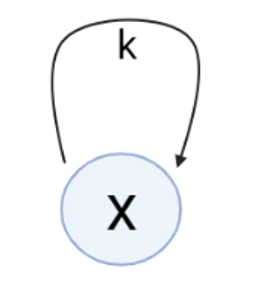

Fig 1. Red del proceso del ejemplo 1. Se aprecia que se considera una sola variable, $x$, en el análisis. Existe un efecto positivo de $x$ sobre sí misma debido al crecimiento de los microorganismo a una tasa constante $k$

## 3 . Establecer modelo 

Para el plantamiento del modelo se puede partir de una balance de biomasa de la siguiente manera

$$
\text{cambio de biomasa en el proceso} = \text{entrada de biomasa} - \text{salida de biomasa} + \text{generación de biomasa} - \text{consumo de biomasa}\\
$$


Dado que no hay entrada, salida, o consumo de biomasa, se tiene 

$$
\text{cambio de biomasa en el proceso} = \text{generación de biomasa} 
$$


El cambio de biomasa con respecto del tiempo se escribe mediante una ED, y usamos (1) para representar la generación de biomasa

$$
\frac{dx(t)}{dt} = kx(t) \tag{2}
$$



Tabla 1. Parámetros del model del ejemplo 1 

| parámetro | valor |
|:---:|:---:|
|   k (1/h) | 0.5    |

El valor del parámetro $k$ en la Tabla 1 ha sido propuesto solo para mostrar el ejemplo 

## 4. Análisis de estabilidad 

Para obtner el punto de equilibrio igualamos (2) a 0 y resolvemos para $x$

$$
\frac{dx(t)}{dt} = kx(t) = 0 \rightarrow x_{ss} = 0
$$

Se obtuvo el punto de equilibrio trivial $x_{ss} = 0$

Para determinar la estabilidad de este punto de equilibrio se pueden emplear varios razonamientos 

1. Calculo de eigenvalores 

PAra una ecuación diferencial como (2) el eigenvalor se obtiene como:

$$
\lambda = \frac{d(kx)}{dx} = k \tag{3}
$$

De esta manera se tiene que el eigenvalor de (2) es $k$. Si este parámetro es positivo (tasa de crecimiento es positiva), el eigenvalor es positivo y el punto de equilibrio es inestable. Si k es negativo, entonces el eigenvalor es negativo y el punto de equilibrio es estable

2. Graficar $dx/dt$ vs $x$

In [1]:
# establecer valor de parámetro
k = 0.5 # 1/h

In [2]:
# cambio de x en t 
dxdt <- function(x) {

    f = k*x

    return(f)
}

In [3]:
# valores de x a evaluar (deben ser biológicamente factibles)
x <- seq(0,10,0.1) # g/L
# evalur dx/dt
f <- dxdt(x) # g/(hL)

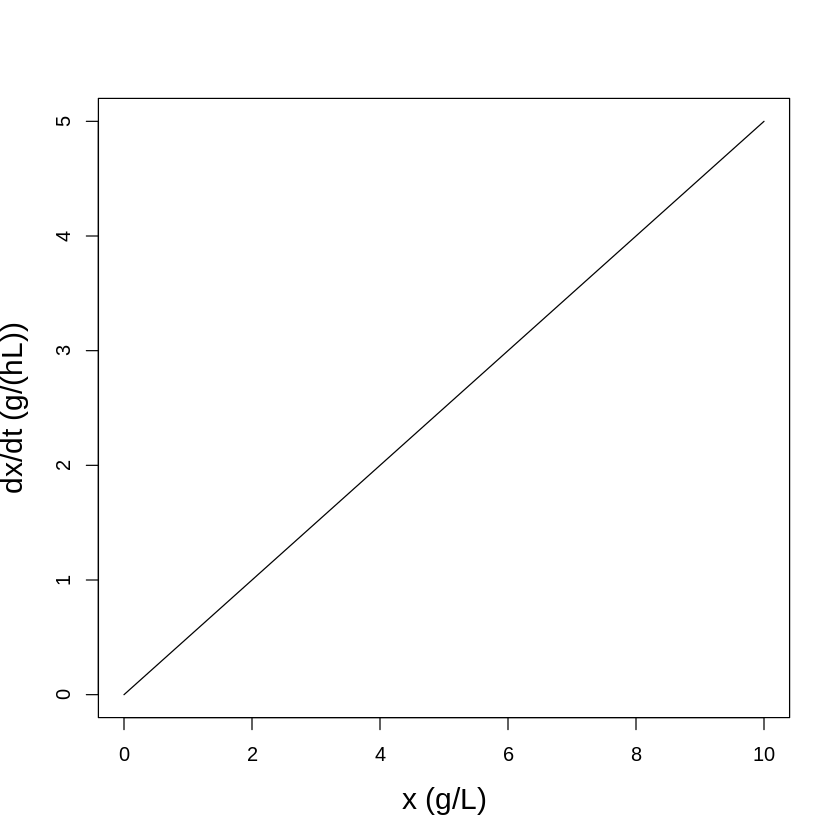

In [4]:
# mostrar gráfica 
plot(x,f, xlab = "x (g/L)", ylab = "dx/dt (g/(hL))", type = "l", cex.lab = 1.5)

Fig 2. Gráfica de $dx/dt$ vs $x$. Se observa que para cualquier valor de $x$ su cambio, $dx/dt$, siempre es positivo. Por esta razón se concluye que para cualquier valor de $x$ distinto de 0, el crecimiento exponencial hará que el sistema se aleje de 0. 

## 2. Análisis dinámico (integración numérica)

### Breve explicación del método de euler

Se tiene la función 

$$
y(x) =  x^2 \tag{4}
$$

el valor de la función en $x_0 = 1$ es:

$$
y(1) = 1^2 = 1
$$

la derivada de (4) es:

$$
\frac{dy}{dt} = \dot{y}(x) =  2x \tag{5}
$$

y su valor en $x_0 = 1$ es: 

$$
\dot{y}(1) = 2 \times 1 = 2\
$$

por lo tanto tenemos que la ecuación de la recta tangente a (4) en $x_0$ es: 

$$
y_t(x) = y(x_0)  + m(x - x_0)  = 1 + 2(x - 1) \
$$


$$
y_t(x) = -1 + 2x \tag{6}\
$$

Donde $m$ es la pendiente (derivada) de (4) en $x_0$

Las funciones (4) y (6) se muestran en la Fig. 3

In [5]:
# función (4)
y_x <- function(x) {
    y = x^2
    return(y)
}

# función (5)
dydx <- function(x0) {
    dy <- 2*x0
    return(dy)
}

# función (6)
yt_x <- function(x0, x) {
    y = -1 + dydx(x0)*x
    return(y)
}

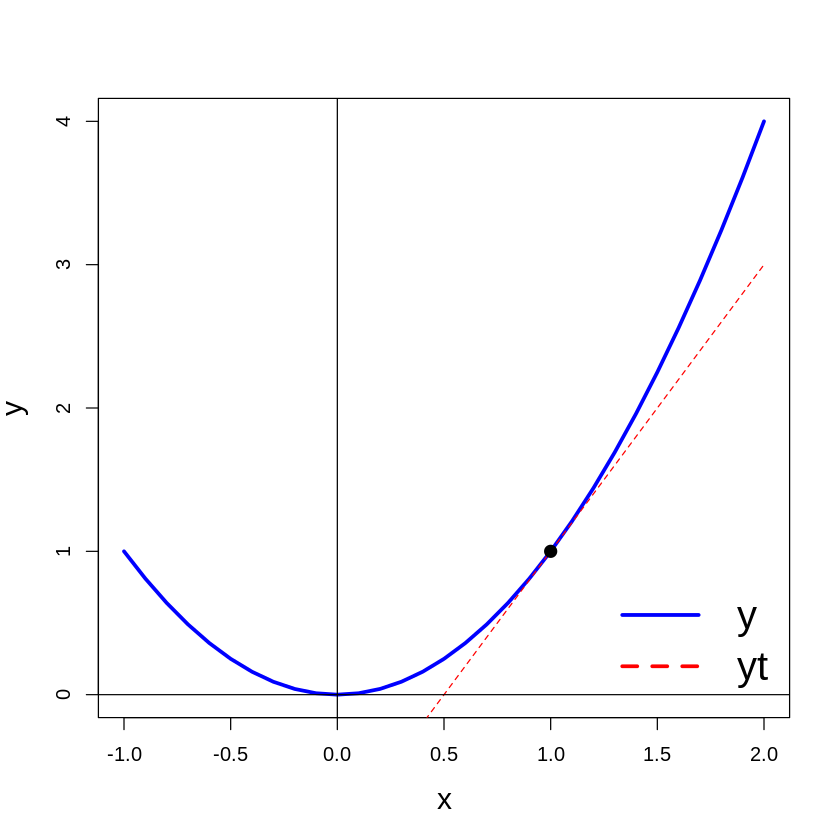

In [6]:
# valores de x a evaluar
x <- seq(-1,2,0.1)

# mostrar funciones
plot(x, y_x(x), type = "l", col = "blue", lwd = 3, xlab = "x", ylab = "y", cex.lab = 1.5)
lines(x, yt_x(1,x), col = "red", lty = 2)
points(1,1, cex = 2, pch = 20)
abline(h = 0, v = 0)
legend("bottomright", legend = c("y", "yt"), bty = "n", lty = c(1,2), lwd = 3,col = c("blue", "red"), cex = 2)

Figura 3. Grafica de $y$ vs $x$ y $y_t$ vs $x$. Nota como ambas funciones tienen valores similares de $y$ alrededor de $x_0 = 1$. 

En la Fig. 3 se observa que ambas funciones tienen valores similares alrededor de $x_0 = 1$. Por lo tanto, una buena aproximación de (4) cerca de $x_0$ es (6). Es decir 

$$
y \approx y_t = 2x - 1
$$

Si usamos (6) como una aproximación de (4) podemos conocer el valor de un cambio en $y$, en (4), a partir de un cambio en $x$, cerca de $x_0$, de la siguiente manera

$$
\Delta y = m \Delta x, \text{válido para una recta}
$$

o si despejamos $y_2$

$$
y_2 = y_1 + m(x_2 - x_1) \tag{7}
$$

por lo tanto si conocemos los valores $x_0$, $x_1$, y $y_0$, podemos obtener $y_1$ a partir de (7)

La ecuación (7) se puede generalizar para cualquier par de valores consecutivos $x_t$ y $x_{t+1}$ como 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}(x_{t+1} - x_t) 
$$

si se establece el tamaño de paso como

$$
h = x_{t+1} - x_t \tag{8}
$$

se tiene 

$$
y_{t+1} = y_t + \frac{dy(x_t)}{dt}h \tag{9}
$$

Evaluando (9) de forma iterativa se logra obtener una buena aproximación de (4) partiendo de una condicion inicial $x_0$

Nota: Hay que tener presente que (9) es válida para la función de una recta. Cuando la función que evaluamos no es una recta, como (4), hemos visto que si se evalua en un valor inicial $x_0$ y se hacen iteraciones consecutivas usando (9) para un tamaño de paso relativamente pequeño, entonces se obtiene una buena aproximación. Esto se puede apreciar en la Fig. 3 

In [7]:
# cargar librerías para resolver EDOs
install.packages("deSolve")
library(deSolve)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [19]:
# establecer modelo 
crecimiento <- function(time, parms, state) {
    with(as.list(c(parms, state)), {

        # balance de biomasa
        dxdt = k*x

        return(list(c(dxdt)))
    })
}

In [20]:
# establecer parámetros 
p <- c(k = 0.5)
# condiciones iniciales
x0 <- c(x = 0.1)
# tiempo de integración
time <- seq(0,10,0.1) # h = 0.1 tamaño de paso

In [21]:
# resolver ED
out <- ode(func = crecimiento, y = x0, times = time, parms = p, method = "euler")

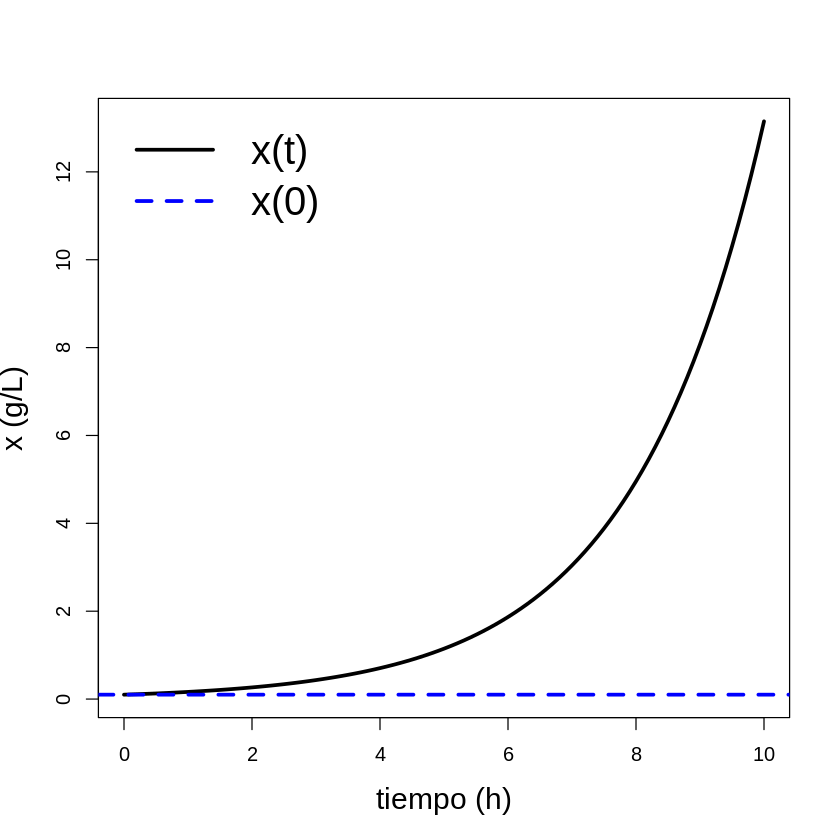

In [33]:
# mostrar resultados 
plot(out[,1], out[,2], xlab = "tiempo (h)", ylab = "x (g/L)", cex.lab = 1.5, type = "l", lwd = 3)
abline(h = x0, lwd = 3, lty = 2, col = "blue")
legend("topleft", legend = c("x(t)", "x(0)"), bty = "n", lty = c(1,2),lwd = 3,, col = c("black", "blue"), cex = 2)

Figur 4. Gráfica de $x(t)$ vs $t$. Se aprecia como la concentración de biomasa, $x(t)$, de aleja de la condición inicial más rápidamente cuando $t \rightarrow \infty$ 

¿Qué ocuriría si el tiempo de simulación fuera de 100 horas? ¿Cuántos microorganismo habría después de 4 días? El modelo (2) tiene limitaciones en cuanto al rango de valores de concentración en el cual describe de forma adecuada el proceso. Si consideramos una población muy grande de microorganismos, es natural pensar que los recursos empezarían a escasear, o se podría generar productos de su metabolismo que resulten tóxicos. Veamos algunos ejemplo que consideren estos efectos negativos sobre el crecimiento 

# 2. Ejemplo 2: Crecimiento logístico 

## 1. Descripción del proceso 

Consideremos una población de peces que viven alimentandose material orgánico presente en su ambiente. Podemos asumir que este material del que se alimentan permanece aproximadamente constante. Además consideremos que la tasa de muerte del los peces es constante. Por otro lado, se tiene que la tasa de nacimiento depende de la cantidad de peces, y obedece la siguiente relación:

$$
b(P) = b(1 - \frac{P}{k_1})
$$

donde $b$ represente la tasa de nacimiento máxima (1/dias), que se obtiene cuando $P \rightarrow \infty$. El parámetro $k_1$ representa la cantidad de peces para la cual la tasa de nacimiento es cero.

In [39]:
birth_rate <- function(P) {
    rate = b*(1 - P/k1)
    return(rate)
} 

In [40]:
# establecer valor de parámetros 
b = 0.5 # 1/dias
k1 = 100 # peces
d = 0.1 # 1/dias

In [41]:
# valores de P a evaluar 
P <- seq(0,120,1)
br <- birth_rate(P)

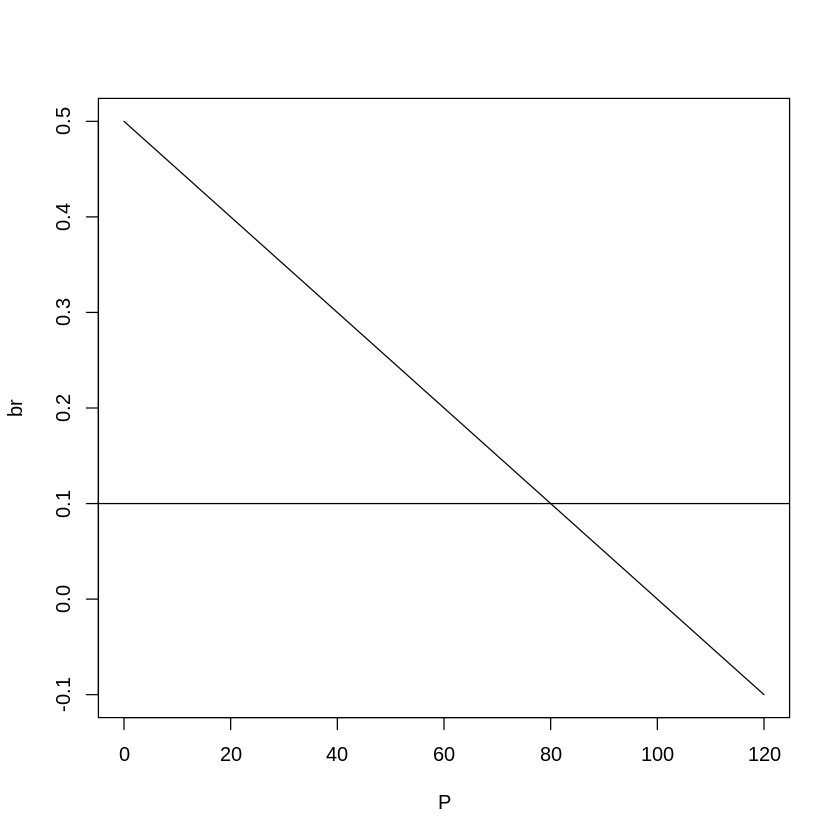

In [43]:
plot(P, br, type = "l")
abline(h = d)